<a href="https://colab.research.google.com/github/jseeun00/ESAA_2021-2/blob/main/2%EC%A1%B0%EB%B0%9C%ED%91%9C1(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5. Modeling

- 현재 ML에서 주로 사용되는 SVM, RF, Boosting Machine등을 활용하여 간단한 NLP 태스크를 해결할 수 있지만, 복잡한 문제를 해결하기에는 한계가 있습니다. 따라서 기본적으로 네트워크 모델을 이용하여 NLP 문제를 해결하는 것이 일반적입니다.


- 이번 노트북에서는 NLP 문제를 해결하기 위해서 주로 쓰이는 RNN과 Layer들의 간단한 구조를 소개해보겠습니다.


##1.RNN
- RNN (Recurrent Neural Network) 알고리즘은 반복적이고 순차적인 데이터(Sequential data)학습에 특화된 인공신경망의 한 종류로서 내부의 순환구조가 들어있다는 특징을 가진 순환신경망입니다.

- 다음의 문장으로 우리가 문장을 이해하는 방식에 대해 생각해봅시다.

      "나는 오늘 스파게티를 먹었는데 그것은 매우 맛있었어"


➜ "그것"은 무엇을 의미하며 우리는 어떻게 이것이 스파게티인 것을 알 수 있을까요? 의식하지 못하지만 우리의 뇌는 문장을 읽어가면서 그동안 읽은 정보들을 활용하여 문장을 읽어나갑니다. 따라서 t 시점의 단어를 온전히 이해하기 위해서는 t-1번째까지의 정보를 포함하여야 합니다. 일반적인 ML 모델이 NLP에 좋지 못한 성능을 보이는 것도 이러한 이유 때문입니다.

- 그렇다면 RNN 구조가 왜 자연어 처리에 많이 이용되는지 살펴보도록 하겠습니다.



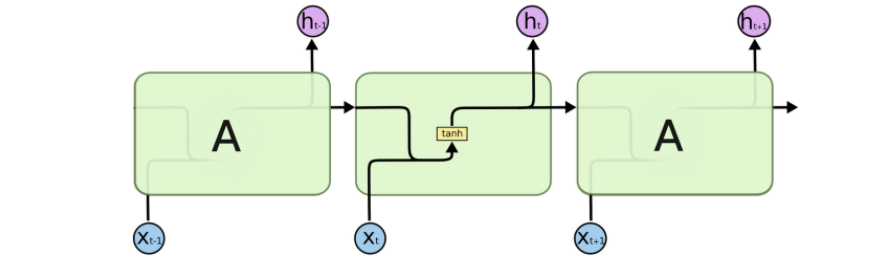

- 그림에서 보시면 x1에 대한 출력이 위쪽 화살표와 아래쪽 화살표 두 개인 것을 확인할 수 있습니다. 즉, x1에 대한 정보가 h1 이라는 출력뿐만 아니라 다음 x2에 대한 정보와 같이 입력되는 구조입니다.

- RNN은 순차적인 구조이며 그 특징 때문에 연산에 많은 시간이 걸리게 되고 네트워크의 고질적인 문제인 역전파 소실 문제가 발생합니다.



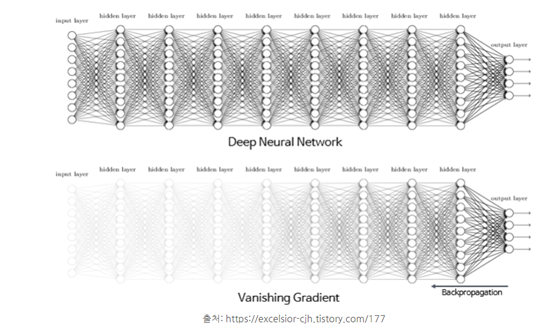

* 역전파: 출력층(output layer)에서 입력층(input layer)으로 거꾸로 오차 그래디언트(gradient)를 흘려보내며 각 뉴런의 입력값에 대한 손실함수의 그래디언트를 계산한 값입니다.


- 근데 이때 hidden layer가 많으면 많을수록 오차 그래디언트가 작아져 결국 가중치 매개변수가 업데이트되지 않아 역전파 소실 문제가 발생합니다. 이 문제를 해결하기 위해서 A에 해당하는 부분을 LSTM(Long Short-Term Memory)과 GRU(Gated Recrurent Unit) 등을 사용하게 됩니다.

##2. LSTM
- 이제 LSTM이 역전파 소실 문제를 해결함으로써 RNN 구조에서 특정 시점의 정보를 다음 시점으로 전달할 때 얼만큼의 정보를 전달할지 결정하는 역할을 하겠다는 것을 유추할 수 있습니다.

- LSTM의 가장 큰 특징은 기존 RNN에 cell state를 추가한 것입니다. 이 cell state는 입력들의 정보를 선별하여 다음 출력으로 내보내는 게이트 역할을 합니다. 이 과정을 통해 불필요한 정보들을 걸러내어 매끄러운 진행이 가능하고 이로 인해 역전파 소실 문제를 줄여 성능이 증가하게 됩니다. 
(https://wooono.tistory.com/242)




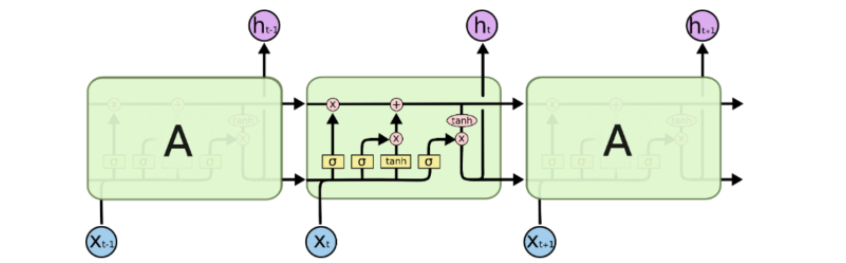

#3. GRU

GRU는 LSTM의 복잡한 구조를 보다 간결하게 보완한 모델입니다. LSTM의 장점을 가져오면서 속도적인 부분을 개선하여 더욱 빠른 속도로 비슷한 성능을 낸다고 알려져 있습니다.

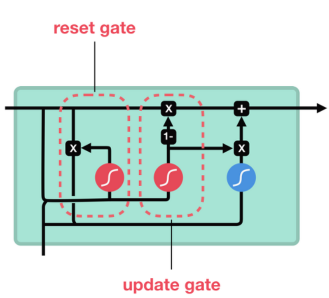

#4. Attention

- attention 매커니즘은 RNN 모델의 구조적인 한계를 극복한 모델입니다. RNN 모델을 활용하여 다음에 올 단어들을 예측하여 문장을 만드는 문제에 대해 생각해 보겠습니다. 

- 단어를 예측할 때 입력으로 받는 정보는 지금까지 입력으로 집어넣었던 정보 모두와 예측 이전 단어입니다. 이런 경우 발생하는 문제점은 크게 두 가지입니다.
1. 입력으로 이용된 정보들을 순차적으로 고정 길이로 압축하면서 발생하는 정보의 손실

2. 역전파 소실

- attention 매커니즘은 이러한 문제를 해결하기 위해 노력했고 다음과 같은 효과를 얻을 수 있습니다.


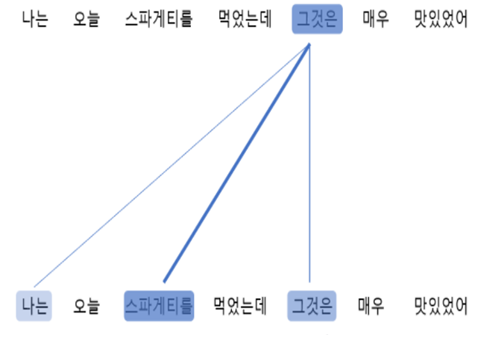

- 예시의 문장에서 "그것은" 이 무엇을 가리키는지 찾기 위해 attention을 이용하면 어떤 토큰의 정보가 가장 큰 도움을 줬는지 알 수 있습니다.

 (https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=ckdgus1433&logNo=221608376139&parentCategoryNo=&categoryNo=12&viewDate=&isShowPopularPosts=true&from=search)

#5. 대회 적용

**간단한 전처리 + 형태소 분석**

In [ ]:
from konlpy.tag import Okt
import re
import tqdm 

def text_preprocessing(text_list):
    
    stopwords = ['을', '를', '이', '가', '은', '는', 'null'] #불용어 설정
    tokenizer = Okt() #형태소 분석기 
    token_list = []
    
    for text in tqdm.tqdm(text_list):
        txt = re.sub('[^가-힣a-z]', ' ', text) #한글과 영어 소문자만 남기고 다른 글자 모두 제거
        token = tokenizer.morphs(txt) 
        token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        token_list.append(token)
        
    return token_list, tokenizer

#형태소 분석기를 따로 저장한 이유는 후에 test 데이터 전처리를 진행할 때 이용해야 되기 때문 
train['token'], okt = text_preprocessing(train['text'])

100%|██████████| 54879/54879 [06:36<00:00, 138.25it/s]


**Vectorization**

In [ ]:
def text2sequence(train_text, max_len=1000):
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_text)
    train_X_seq = tokenizer.texts_to_sequences(train_text)
    vocab_size = len(tokenizer.word_index) + 1 #모델에게 알려줄 vocabulary의 크기 계산 
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding
    return X_train, vocab_size, tokenizer

train_y = train['author']
train_X, vocab_size, vectorizer = text2sequence(train['token'], max_len = 100)
print(train_X.shape, train_y.shape)

vocab_size :  36342
(54879, 100) (54879,)


**Embedding**

In [ ]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/Colab Notebooks/ESAA/4주차/GoogleNews-vectors-negative300.bin.gz', binary = True)
embedding_matrix = np.zeros((vocab_size, 300)) 

for index, word in enumerate(vocabulary): 
    if word in word2vec:  
        embedding_vector = word2vec[word] 
        embedding_matrix[i] = embedding_vector
    else:
        print("word2vec에 없는 단어입니다.")
        break

**Modeling**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding

def LSTM(vocab_size, max_len=1000):
    model = Sequential()
    #Sequential 모델은 층을 순서대로 쌓은 것으로, 아래와 같이 각 층 인스턴스를 리스트 형식으로 나열

    model.add(Embedding(vocab_size, 300,weights = [embedding_matrx], input_length = max_len)) #임베딩 가중치 적용 코드
    model.add(SpatialDropout1D(0.3)) #입력 벡터 중 30%만큼 층의 출력을 줄여
    model.add(LSTM(64)) #64 차원의 단일 벡터를 반환
    model.add(Dropout(0.5)) #학습과정 중 각 업데이트에서 임의로 인풋유닛을 0으로 설정하는 비율 0.5로 설정
    model.add(Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001))) #64차원 출력에 'relu' 함수를 적용
    model.add(Dense(1, activation='sigmoid')) #1차원 출력에 'sigmoid' 함수를 적용
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    model.summary()
    return model